In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

In [2]:
# %matplotlib inline

Text(0.5,0,'Some Parameter')

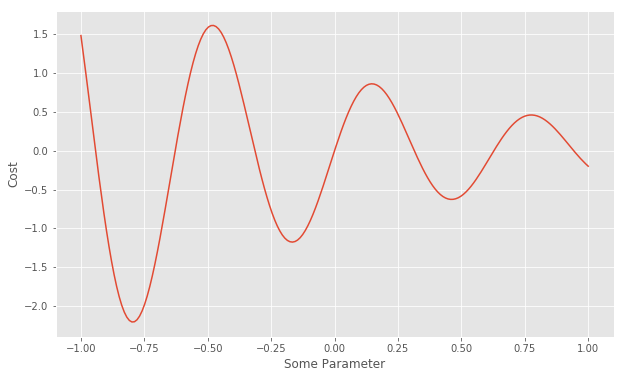

In [3]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

In [4]:
gradient = np.diff(cost)

Text(0.5,0,'Cost')

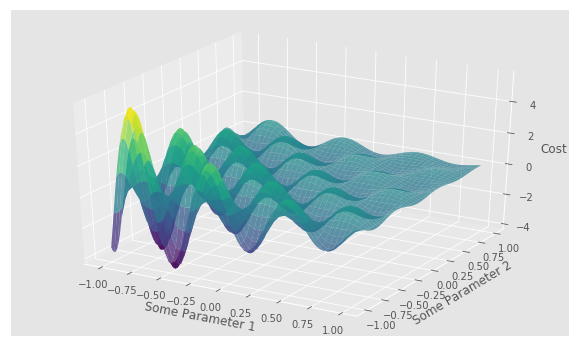

In [5]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='viridis', shade=False)
ax.set_xlabel('Some Parameter 1')
ax.set_ylabel('Some Parameter 2')
ax.set_zlabel('Cost')
# ax.axis('off')

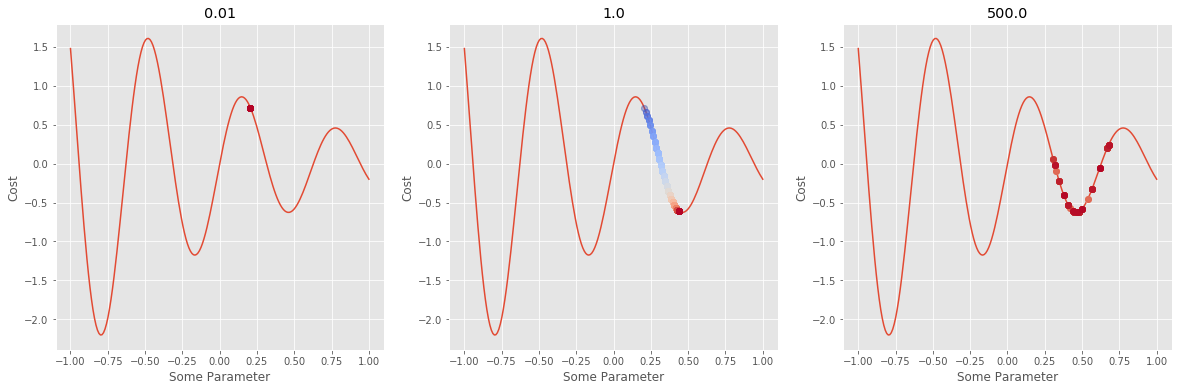

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(init_p)]
        ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

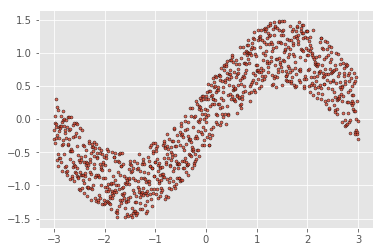

In [7]:
# Let's create some toy data

# We are going to say that we have seen 1000 values of some underlying representation that we aim to discover
n_observations = 1000

# Instead of having an image as our input, we're going to have values from -3 to 3.
# This is going to be the input to our network.
xs = np.linspace(-3, 3, n_observations)

# From this input, we're going to teach our network to represent a function that looks like a sine wave.  To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform noise.  So our true representation is a sine wave, but we are going to make it difficult by adding some noise to the function, and try to have our algorithm discover the underlying cause of the data, which is the sine wave without any noise.
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, edgecolors='black', alpha=0.8, marker='.')

# Defining Cost

### define the ```tf.placeholders``` for i/o

In [8]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

### create ```session```

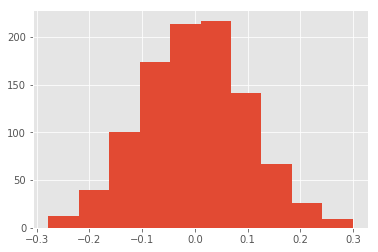

In [9]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000], stddev=0.1).eval()
hist = plt.hist(n)

### define ```tf.Variables```

In [10]:
W = tf.Variable(
    tf.random_normal(
        [1],
        dtype=tf.float32,
        stddev=0.1),
    name='weight')
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')
Y_pred = X * W + B

In [11]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

### define ```cost``` and ```optimizer```

In [12]:
cost = tf.reduce_mean(distance(Y_pred, Y))

optimizer = tf.train.GradientDescentOptimizer(
        learning_rate=0.01
    ).minimize(cost)

### training time !!!

cost: 0.68431145
cost: 0.5491652
cost: 0.47725123
cost: 0.44511798
cost: 0.4331726
cost: 0.42877722
cost: 0.42687157
cost: 0.42602438
cost: 0.42566425
cost: 0.42546594
cost: 0.42535108
cost: 0.42530337
cost: 0.4252597
cost: 0.42523515


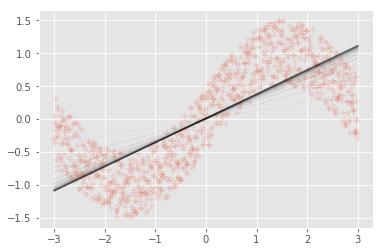

In [13]:
n_iterations = 500

fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.global_variables_initializer())
    
    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            # fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print('cost: ' + str(training_cost))

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

## Stochastic and Mini Batch Gradient Descent

In [14]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


## randomly permute the indexes

In [15]:
rand_idxs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_idxs) // batch_size
print('# of batches:', n_batches)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

# of batches: 10
[99 79 17  5 97  8 93 85 16 34]
[43 80 15 59 91 26 57 66 29  9]
[18 89 38 36  4 62 31 28  6  1]
[52 23 49 94 35 81 65 60 75 50]
[12 73 71 92 95 83 88 78 61 54]
[24 51 56 11 46 48  7 67 86 32]
[42 10  0 77 76 58 44 25 64 27]
[69 84 13  3 68 22 41 45 21 14]
[30 55 37  2 39 20 90 40 87 74]
[98 82 70 53 96 47 19 63 72 33]


0.57265073
0.48947966
0.44997224
0.43481922
0.4293539
0.42715722
0.42615706
0.4257301
0.42551765
0.42537114
0.4253208
0.42527306
0.42524165
0.42522535
0.42521864
0.42521545
0.42521286
0.4252102
0.42520875
0.42520866
0.42520863
0.4252086
0.42520854
0.4252085
0.42520848
0.4252084
0.42520836
0.42520833
0.4252083
0.42520827
0.42520818
0.42520815
0.42520818
0.42520812
0.42520806
0.42520806
0.425208
0.42520797
0.42520794
0.42520788
0.42520788
0.42520782
0.42520776
0.42520785
0.42520782
0.42520782
0.42520782
0.42520785
0.42520782
0.42520782


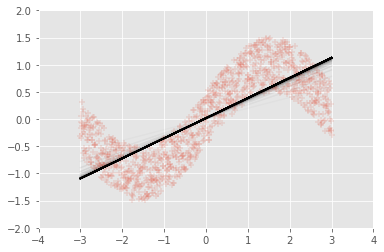

In [16]:
batch_size = 1000
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or tf.constant_intitializer,
    # then this would have set `W` and `b` to their initial values.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            print(training_cost)
# fig.show()
plt.draw()

### Few things to notice
上面的做法是每個 batch 就會 update 一次。在 ```Y_pred.eval(feed_dict={X: xs}, session=sess)``` 需要放進 ```session``` 的變數，為什麼？他不知道現在的 session 是什麼嗎？
回去看 code，就會發現這裡都是使用 default graph，沒有自己製作一個。

# ```train``` function

我在這裡先仔細想想看```train```應該需要具備哪些必要的步驟。
```eval```和```run```的差異是什麼？

In [17]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.global_variables_initializer())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    # fig.show()
    plt.draw()

## create neurons

2.8758047
2.5610197
2.19108
1.9717358
1.3475801
2.7202609
1.8016001
0.77613753
1.5208741
1.9802347


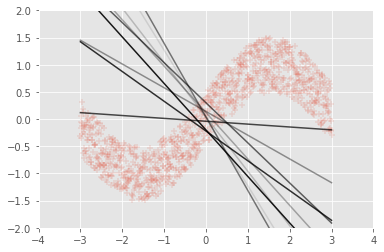

In [18]:
n_neurons = 100

# variables
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# use matrix multiplication
# use 'expand_dims' to make X a matrix (1, 1)
# W is a matrix (1, n)
h = tf.matmul(tf.expand_dims(X, 1), W) + b
Y_pred = tf.reduce_sum(h, 1) # tf.reduce_sum(tensor, axis)

train(X, Y, Y_pred)

0.6845664
0.44294268
0.42681214
0.425328
0.42521343
0.42520905
0.42520872
0.42520887
0.42520875
0.42520955


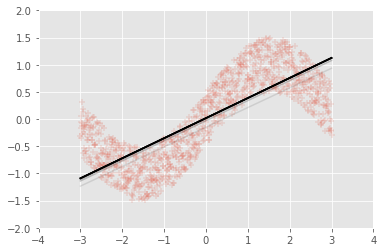

In [19]:
# bias
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')

# weights for poly
for pow_i in range(1, 2):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

train(X, Y, Y_pred)

0.6675251
0.48226315
0.45820197
0.5494823
0.402943
0.57544106
0.42990467
0.6951778
0.56627953
0.65003663


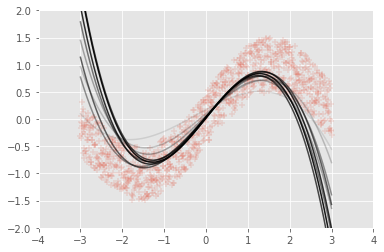

In [20]:
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

train(X, Y, Y_pred)

### overfitting
過度去 fit 現有的 training data

3.7033653
2.8531148
3.7497218
1.9733458
4.5161796
1.9353083
2.7920375
2.24291
4.9131465
3.3174927


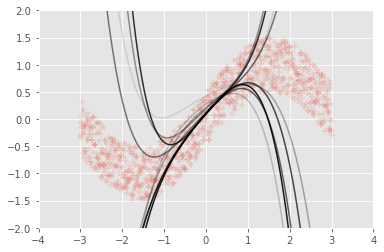

In [21]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 5):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

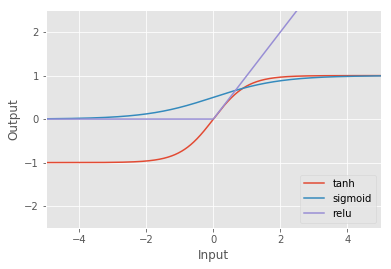

In [22]:
scp = 5
with tf.Session() as sess:
    x = np.linspace(-scp,scp,1000)
    plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
    plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
    plt.plot(x, tf.nn.relu(x).eval(), label='relu')
    plt.legend(loc='lower right')
    plt.xlim([-scp, scp])
    plt.ylim([-scp*.5, scp*.5])
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.grid(True)

0.47716004
0.29067335
0.27397302
0.2675836
0.2656096
0.26459125
0.26412508
0.26344842
0.26277727
0.26234645


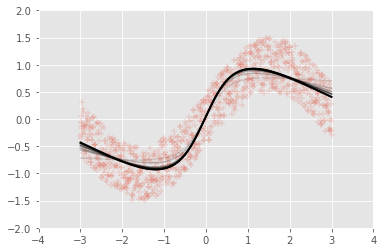

In [23]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

# the only difference from the earlier one, is the tanh activation 
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')

Y_pred = tf.reduce_sum(h, 1)

train(X, Y, Y_pred)

## Going Deeper

In [24]:
def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

In [25]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [26]:
# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

[]

In [27]:
# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

The names of the variables in this network aren't very helpful. We can actually do a much better job here by creating our variables within scopes:

In [28]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [29]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

If we create multiple linear connections, this becomes really useful for understanding what's in our graph:

In [30]:
h2 = linear(h, 10, 10, scope='layer2')
h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b/Initializer/Const',
 'layer2/b',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'layer3/W/Initiali

# Image Inpainting

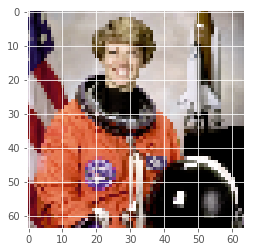

In [67]:
from skimage.data import astronaut
from skimage.transform import resize
img = resize(
    astronaut(),
    (64, 64), order=1,
    anti_aliasing=False,
    mode='constant')
plt.imshow(img)

Instead of using a network to go from some x position to the value of a sine wave, what we're going to do instead teach a network to go from the location on an image frame to a particular color.  So given any position in an image, the network will need to learn what color to paint.  Despite the seeming complexity of this task, it is remarkably similar to what we've just done.  Let's take a look.

In [32]:
img.shape

(64, 64, 3)

In [33]:
pos = []
colors = []

for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        pos.append([r, c])
        colors.append(img[r, c])
        
pos = np.array(pos)
colors = np.array(colors)

# normalize
pos = (pos - np.mean(pos)) / np.std(pos)

print(pos.shape, colors.shape)

(4096, 2) (4096, 3)


In [51]:
colors

array([[0.81666667, 0.79019608, 0.79215686],
       [0.12843137, 0.08529412, 0.23431373],
       [0.02254902, 0.00882353, 0.06470588],
       ...,
       [0.12352941, 0.10686275, 0.06764706],
       [0.35686275, 0.34313725, 0.31862745],
       [0.08627451, 0.0754902 , 0.0627451 ]])

`(batch_size, dimension)`

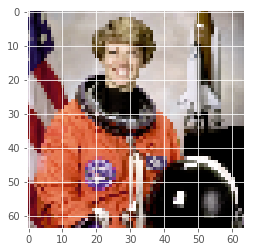

In [45]:
plt.imshow(colors.reshape(img.shape))

In [35]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

## Building The Network

In [36]:
# the first number is for the input layer X
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_layer = X
# start from 64, because the input layer has been established
for layer_i in range(1, len(n_neurons)):
    current_layer = linear(
        X=current_layer,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i + 1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))

Y_pred = current_layer

In [37]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

In [38]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

## difference
因為我有用的 resize 跟 example 裡面的不一樣
所以我的 img 的 (r,g,b) 是 0-1 的範圍
才導致剛剛原本畫出來的畫面都是黑的
我把最後成果乘以 255 就解決了

就算 evaluation 時候沒有放進去 session 也是可以的

#iteration 0: 0.5930444
#iteration 1: 0.5376221
#iteration 2: 0.5298206
#iteration 3: 0.51503575
#iteration 4: 0.50541174
#iteration 5: 0.48389065
#iteration 6: 0.48882806
#iteration 7: 0.46303058
#iteration 8: 0.45808133
#iteration 9: 0.44933143
#iteration 10: 0.444412
#iteration 11: 0.44577545
#iteration 12: 0.43388507
#iteration 13: 0.42588732
#iteration 14: 0.42786908
#iteration 15: 0.4153592
#iteration 16: 0.41272426
#iteration 17: 0.4136572
#iteration 18: 0.40703452
#iteration 19: 0.40568936


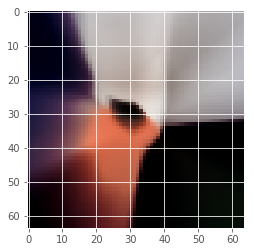

#iteration 20: 0.41511482
#iteration 21: 0.40646237
#iteration 22: 0.40058076
#iteration 23: 0.43137574
#iteration 24: 0.39749247
#iteration 25: 0.39384615
#iteration 26: 0.39108333
#iteration 27: 0.39864975
#iteration 28: 0.3878423
#iteration 29: 0.37702665
#iteration 30: 0.38064587
#iteration 31: 0.40010175
#iteration 32: 0.36994705
#iteration 33: 0.3789227
#iteration 34: 0.372813
#iteration 35: 0.36479202
#iteration 36: 0.36773634
#iteration 37: 0.36691564
#iteration 38: 0.37146467
#iteration 39: 0.37806386


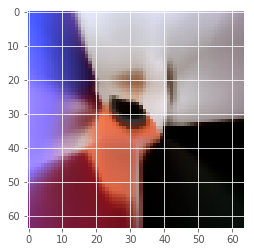

#iteration 40: 0.3545474
#iteration 41: 0.34220695
#iteration 42: 0.3552327
#iteration 43: 0.3604362
#iteration 44: 0.35345554
#iteration 45: 0.3531636
#iteration 46: 0.35265008
#iteration 47: 0.35366464
#iteration 48: 0.33629638
#iteration 49: 0.33445564
#iteration 50: 0.34337857
#iteration 51: 0.32683814
#iteration 52: 0.3347436
#iteration 53: 0.31353182
#iteration 54: 0.31527433
#iteration 55: 0.31823328
#iteration 56: 0.328681
#iteration 57: 0.3039373
#iteration 58: 0.32662648
#iteration 59: 0.32904303


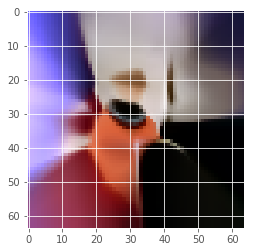

#iteration 60: 0.3152365
#iteration 61: 0.30993053
#iteration 62: 0.3331344
#iteration 63: 0.30436224
#iteration 64: 0.3118698
#iteration 65: 0.3053406
#iteration 66: 0.30591616
#iteration 67: 0.31478003
#iteration 68: 0.3176614
#iteration 69: 0.3070768
#iteration 70: 0.2912472
#iteration 71: 0.3006877
#iteration 72: 0.2951061
#iteration 73: 0.29992703
#iteration 74: 0.30153716
#iteration 75: 0.29496372
#iteration 76: 0.28831112
#iteration 77: 0.3071434
#iteration 78: 0.27839616
#iteration 79: 0.30578408


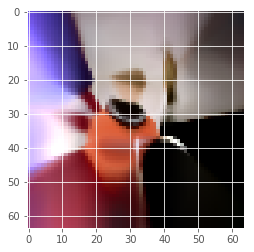

#iteration 80: 0.30276436
#iteration 81: 0.28800288
#iteration 82: 0.2985942
#iteration 83: 0.2804565
#iteration 84: 0.29264647
#iteration 85: 0.30190986
#iteration 86: 0.28053558
#iteration 87: 0.2785016
#iteration 88: 0.3032112
#iteration 89: 0.3113253
#iteration 90: 0.28479582
#iteration 91: 0.3116913
#iteration 92: 0.26201633
#iteration 93: 0.28677833
#iteration 94: 0.27877468
#iteration 95: 0.271349
#iteration 96: 0.2864553
#iteration 97: 0.27096868
#iteration 98: 0.26713115
#iteration 99: 0.27499393


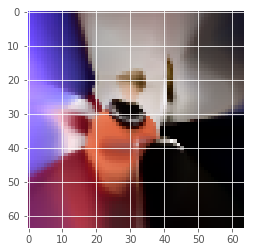

#iteration 100: 0.26581526
#iteration 101: 0.27263284
#iteration 102: 0.28440434
#iteration 103: 0.27782005
#iteration 104: 0.26253313
#iteration 105: 0.2635029
#iteration 106: 0.27565098
#iteration 107: 0.2787602
#iteration 108: 0.25845417
#iteration 109: 0.25726938
#iteration 110: 0.2626896
#iteration 111: 0.26836425
#iteration 112: 0.2572281
#iteration 113: 0.26927155
#iteration 114: 0.25601542
#iteration 115: 0.27809954
#iteration 116: 0.26526386
#iteration 117: 0.26191396
#iteration 118: 0.25911424
#iteration 119: 0.27340382


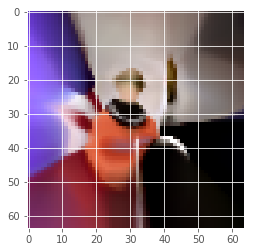

#iteration 120: 0.24709433
#iteration 121: 0.26050374
#iteration 122: 0.26612994
#iteration 123: 0.25674847
#iteration 124: 0.29121667
#iteration 125: 0.25532544
#iteration 126: 0.26616418
#iteration 127: 0.25392303
#iteration 128: 0.26372847
#iteration 129: 0.27967536
#iteration 130: 0.26385552
#iteration 131: 0.2497172
#iteration 132: 0.24890752
#iteration 133: 0.2523712
#iteration 134: 0.23906475
#iteration 135: 0.24444935
#iteration 136: 0.25936657
#iteration 137: 0.24654612
#iteration 138: 0.23743166
#iteration 139: 0.24871376


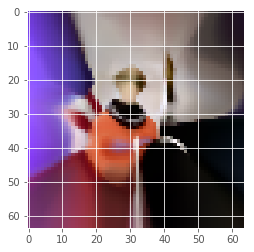

#iteration 140: 0.24077824
#iteration 141: 0.24422568
#iteration 142: 0.26896375
#iteration 143: 0.24478349
#iteration 144: 0.25287795
#iteration 145: 0.25111037
#iteration 146: 0.24974552
#iteration 147: 0.24864739
#iteration 148: 0.23156588
#iteration 149: 0.22905433
#iteration 150: 0.2482108
#iteration 151: 0.24954534
#iteration 152: 0.23798901
#iteration 153: 0.24730743
#iteration 154: 0.24320963
#iteration 155: 0.26237357
#iteration 156: 0.23893037
#iteration 157: 0.24375346
#iteration 158: 0.2333255
#iteration 159: 0.25802115


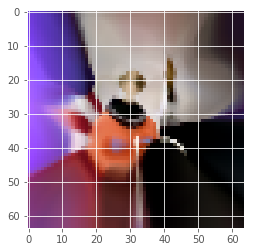

#iteration 160: 0.24751247
#iteration 161: 0.2318547
#iteration 162: 0.22702402
#iteration 163: 0.23290399
#iteration 164: 0.2381268
#iteration 165: 0.23038757
#iteration 166: 0.26131988
#iteration 167: 0.23134199
#iteration 168: 0.24257459
#iteration 169: 0.24013221
#iteration 170: 0.24470583
#iteration 171: 0.2431911
#iteration 172: 0.2464821
#iteration 173: 0.23968846
#iteration 174: 0.23860326
#iteration 175: 0.2389219
#iteration 176: 0.23150237
#iteration 177: 0.23228696
#iteration 178: 0.22683781
#iteration 179: 0.2373364


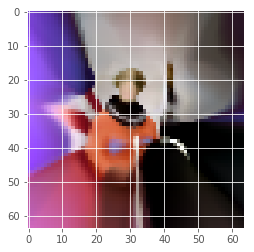

#iteration 180: 0.22661234
#iteration 181: 0.2351586
#iteration 182: 0.23849413
#iteration 183: 0.23481098
#iteration 184: 0.25704646
#iteration 185: 0.24096937
#iteration 186: 0.2203938
#iteration 187: 0.24067107
#iteration 188: 0.23162109
#iteration 189: 0.21648957
#iteration 190: 0.24244031
#iteration 191: 0.22358766
#iteration 192: 0.23784018
#iteration 193: 0.23149613
#iteration 194: 0.22361249
#iteration 195: 0.22310217
#iteration 196: 0.23070058
#iteration 197: 0.21966559
#iteration 198: 0.22348107
#iteration 199: 0.23409243


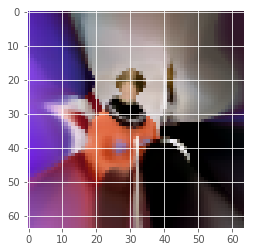

#iteration 200: 0.22873902
#iteration 201: 0.22423974
#iteration 202: 0.22974464
#iteration 203: 0.23945132
#iteration 204: 0.2215091
#iteration 205: 0.24941891
#iteration 206: 0.22085479
#iteration 207: 0.22257727
#iteration 208: 0.23031029
#iteration 209: 0.22194418
#iteration 210: 0.22421782
#iteration 211: 0.24046361
#iteration 212: 0.2158767
#iteration 213: 0.23924524
#iteration 214: 0.22004789
#iteration 215: 0.2517699
#iteration 216: 0.22193936
#iteration 217: 0.23049006
#iteration 218: 0.2415435
#iteration 219: 0.2183361


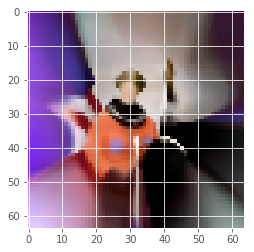

#iteration 220: 0.22380069
#iteration 221: 0.23213491
#iteration 222: 0.2169081
#iteration 223: 0.22070104
#iteration 224: 0.21092063
#iteration 225: 0.20785943
#iteration 226: 0.23499796
#iteration 227: 0.22955213
#iteration 228: 0.22892594
#iteration 229: 0.25498047
#iteration 230: 0.22988337
#iteration 231: 0.21021077
#iteration 232: 0.23304206
#iteration 233: 0.21993038
#iteration 234: 0.23136887
#iteration 235: 0.21132836
#iteration 236: 0.21079198
#iteration 237: 0.19691902
#iteration 238: 0.23009866
#iteration 239: 0.2263298


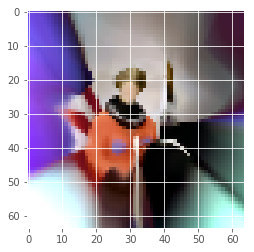

#iteration 240: 0.23686711
#iteration 241: 0.21253854
#iteration 242: 0.20500776
#iteration 243: 0.23566678
#iteration 244: 0.21327709
#iteration 245: 0.21189539
#iteration 246: 0.20651019
#iteration 247: 0.22967283
#iteration 248: 0.2199414
#iteration 249: 0.22606087
#iteration 250: 0.21285687
#iteration 251: 0.22614644
#iteration 252: 0.20459342
#iteration 253: 0.2087598
#iteration 254: 0.21913889
#iteration 255: 0.21244182
#iteration 256: 0.21060702
#iteration 257: 0.20285356
#iteration 258: 0.21417376
#iteration 259: 0.2165553


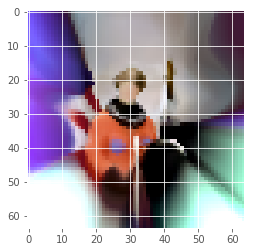

#iteration 260: 0.2083332
#iteration 261: 0.21756005
#iteration 262: 0.21653107
#iteration 263: 0.22131962
#iteration 264: 0.20898823
#iteration 265: 0.22260141
#iteration 266: 0.22600162
#iteration 267: 0.21707503
#iteration 268: 0.21069863
#iteration 269: 0.2065753
#iteration 270: 0.2199003
#iteration 271: 0.19322658
#iteration 272: 0.20597316
#iteration 273: 0.21665794
#iteration 274: 0.20747185
#iteration 275: 0.20249276
#iteration 276: 0.21693529
#iteration 277: 0.21843986
#iteration 278: 0.20433009
#iteration 279: 0.2218421


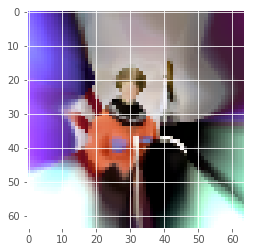

#iteration 280: 0.19886458
#iteration 281: 0.21700826
#iteration 282: 0.22070843
#iteration 283: 0.21474807
#iteration 284: 0.20863938
#iteration 285: 0.19542217
#iteration 286: 0.19734989
#iteration 287: 0.20895779
#iteration 288: 0.20417601
#iteration 289: 0.20775674
#iteration 290: 0.20614317
#iteration 291: 0.20604713
#iteration 292: 0.19404384
#iteration 293: 0.19385153
#iteration 294: 0.20431714
#iteration 295: 0.18857843
#iteration 296: 0.21239462
#iteration 297: 0.21023178
#iteration 298: 0.21358404
#iteration 299: 0.18981779


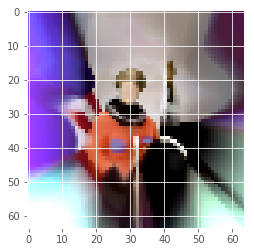

#iteration 300: 0.20055474
#iteration 301: 0.21658725
#iteration 302: 0.20829433
#iteration 303: 0.21343601
#iteration 304: 0.20472562
#iteration 305: 0.20377183
#iteration 306: 0.19875968
#iteration 307: 0.21265784
#iteration 308: 0.19363771
#iteration 309: 0.1950728
#iteration 310: 0.2140515
#iteration 311: 0.20024
#iteration 312: 0.2138961
#iteration 313: 0.20214394
#iteration 314: 0.19077519
#iteration 315: 0.21164532
#iteration 316: 0.20332941
#iteration 317: 0.20097387
#iteration 318: 0.2046521
#iteration 319: 0.18039748


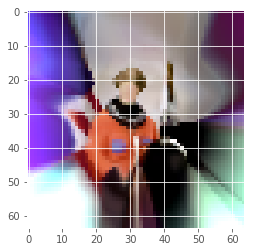

#iteration 320: 0.18863305
#iteration 321: 0.18596405
#iteration 322: 0.19712709
#iteration 323: 0.21270366
#iteration 324: 0.2110061
#iteration 325: 0.20368321
#iteration 326: 0.19583121
#iteration 327: 0.20676544
#iteration 328: 0.19586015
#iteration 329: 0.189409
#iteration 330: 0.20612615
#iteration 331: 0.18790314
#iteration 332: 0.20625557
#iteration 333: 0.18983105
#iteration 334: 0.19807516
#iteration 335: 0.21973656
#iteration 336: 0.20073447
#iteration 337: 0.19443107
#iteration 338: 0.1892358
#iteration 339: 0.21732038


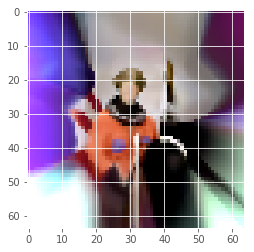

#iteration 340: 0.20936576
#iteration 341: 0.19587669
#iteration 342: 0.18714416
#iteration 343: 0.18932529
#iteration 344: 0.19199514
#iteration 345: 0.18767402
#iteration 346: 0.18471473
#iteration 347: 0.18270397
#iteration 348: 0.21144141
#iteration 349: 0.1824941
#iteration 350: 0.19045724
#iteration 351: 0.18368354
#iteration 352: 0.19329843
#iteration 353: 0.19807905
#iteration 354: 0.1860744
#iteration 355: 0.19542411
#iteration 356: 0.2063171
#iteration 357: 0.19103134
#iteration 358: 0.1798361
#iteration 359: 0.17900622


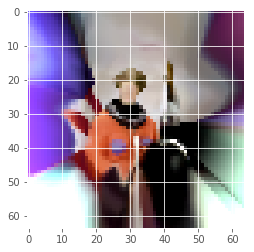

#iteration 360: 0.18914367
#iteration 361: 0.18295059
#iteration 362: 0.17765836
#iteration 363: 0.17924619
#iteration 364: 0.1777271
#iteration 365: 0.19030352
#iteration 366: 0.18726195
#iteration 367: 0.18498081
#iteration 368: 0.1899068
#iteration 369: 0.17827795
#iteration 370: 0.19095543
#iteration 371: 0.18708867
#iteration 372: 0.19306011
#iteration 373: 0.2004258
#iteration 374: 0.19678885
#iteration 375: 0.19396923
#iteration 376: 0.19398694
#iteration 377: 0.22111145
#iteration 378: 0.1751638
#iteration 379: 0.18818584


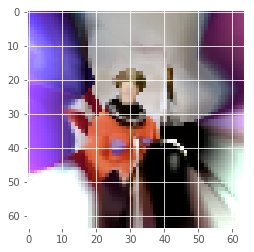

#iteration 380: 0.1969536
#iteration 381: 0.18046187
#iteration 382: 0.20081982
#iteration 383: 0.1815946
#iteration 384: 0.20273247
#iteration 385: 0.21137607
#iteration 386: 0.2013057
#iteration 387: 0.20150723
#iteration 388: 0.18840197
#iteration 389: 0.18474482
#iteration 390: 0.18599729
#iteration 391: 0.17644036
#iteration 392: 0.18063506
#iteration 393: 0.17803043
#iteration 394: 0.1829591
#iteration 395: 0.17596015
#iteration 396: 0.18202308
#iteration 397: 0.16646095
#iteration 398: 0.17880666
#iteration 399: 0.17472926


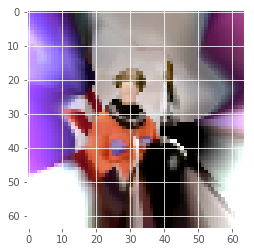

#iteration 400: 0.1923397
#iteration 401: 0.17419496
#iteration 402: 0.18027449
#iteration 403: 0.18292469
#iteration 404: 0.17510486
#iteration 405: 0.17609581
#iteration 406: 0.17696977
#iteration 407: 0.17484857
#iteration 408: 0.19515197
#iteration 409: 0.17906383
#iteration 410: 0.17918557
#iteration 411: 0.1955013
#iteration 412: 0.17140435
#iteration 413: 0.18292713
#iteration 414: 0.17914069
#iteration 415: 0.18307859
#iteration 416: 0.1703723
#iteration 417: 0.16977811
#iteration 418: 0.17530227
#iteration 419: 0.17743033


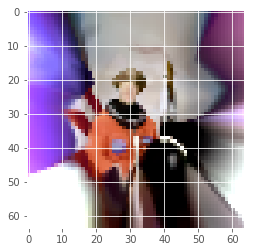

#iteration 420: 0.18252265
#iteration 421: 0.1883581
#iteration 422: 0.17587177
#iteration 423: 0.17529659
#iteration 424: 0.16548014
#iteration 425: 0.16536133
#iteration 426: 0.18931448
#iteration 427: 0.17820719
#iteration 428: 0.17440042
#iteration 429: 0.16770741
#iteration 430: 0.17390725
#iteration 431: 0.16594552
#iteration 432: 0.17173177
#iteration 433: 0.17109554
#iteration 434: 0.16550238
#iteration 435: 0.17676367
#iteration 436: 0.18221104
#iteration 437: 0.18012375
#iteration 438: 0.16417512
#iteration 439: 0.17819783


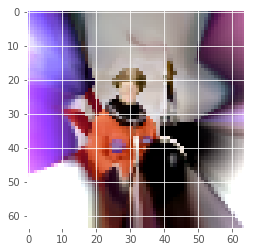

#iteration 440: 0.19517037
#iteration 441: 0.18709186
#iteration 442: 0.17046465
#iteration 443: 0.16853309
#iteration 444: 0.17185238
#iteration 445: 0.1803737
#iteration 446: 0.18736632
#iteration 447: 0.16584697
#iteration 448: 0.16583562
#iteration 449: 0.17196238
#iteration 450: 0.1781192
#iteration 451: 0.18060622
#iteration 452: 0.18611896
#iteration 453: 0.16228783
#iteration 454: 0.1726526
#iteration 455: 0.17473233
#iteration 456: 0.16329873
#iteration 457: 0.16193682
#iteration 458: 0.16622348
#iteration 459: 0.17403507


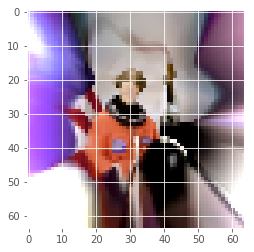

#iteration 460: 0.1577919
#iteration 461: 0.17375374
#iteration 462: 0.16303396
#iteration 463: 0.16523239
#iteration 464: 0.15918316
#iteration 465: 0.16991797
#iteration 466: 0.18966758
#iteration 467: 0.16725563
#iteration 468: 0.17232236
#iteration 469: 0.18617184
#iteration 470: 0.18122303
#iteration 471: 0.18227653
#iteration 472: 0.16837701
#iteration 473: 0.16118267
#iteration 474: 0.17514092
#iteration 475: 0.1659853
#iteration 476: 0.16002361
#iteration 477: 0.1566881
#iteration 478: 0.15477166
#iteration 479: 0.1664684


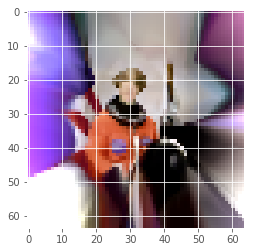

#iteration 480: 0.1588389
#iteration 481: 0.17760226
#iteration 482: 0.17267129
#iteration 483: 0.17303604
#iteration 484: 0.16539446
#iteration 485: 0.16719607
#iteration 486: 0.16636401
#iteration 487: 0.1641039
#iteration 488: 0.17796034
#iteration 489: 0.15918642
#iteration 490: 0.15982482
#iteration 491: 0.16214219
#iteration 492: 0.16608068
#iteration 493: 0.16102299
#iteration 494: 0.15815552
#iteration 495: 0.1783297
#iteration 496: 0.17014779
#iteration 497: 0.16299288
#iteration 498: 0.15501519
#iteration 499: 0.15792876


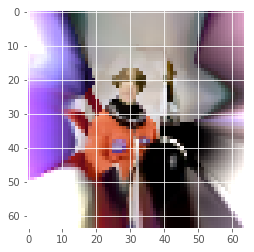

In [61]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(pos)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i*batch_size : (batch_i+1)*batch_size]
            sess.run(optimizer, feed_dict={X: pos[idxs_i] , Y: colors[idxs_i]})
            
        training_cost = sess.run(cost, feed_dict={X: pos, Y: colors})
        print('#iteration ' + str(it_i) + ': ' + str(training_cost))
    
        if (it_i + 1) % 20 == 0:
            color_pred = Y_pred.eval(feed_dict={X: pos * 2})
            fig, ax = plt.subplots(1, 1)
            img = np.clip(color_pred.reshape(img.shape) * 255, 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()

/Users/vibertthio/.pyenv/versions/3.5.4/envs/cadl/lib/python3.5/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


#iteration 0: 0.60143477
#iteration 1: 0.547844
#iteration 2: 0.53067386
#iteration 3: 0.5132456
#iteration 4: 0.49521625
#iteration 5: 0.46849096
#iteration 6: 0.4387747
#iteration 7: 0.4338506
#iteration 8: 0.42454296
#iteration 9: 0.41998908
#iteration 10: 0.42764705
#iteration 11: 0.43990913
#iteration 12: 0.4230169
#iteration 13: 0.4160515
#iteration 14: 0.41533223
#iteration 15: 0.41876537
#iteration 16: 0.4094172
#iteration 17: 0.4026118
#iteration 18: 0.40477926
#iteration 19: 0.40142083


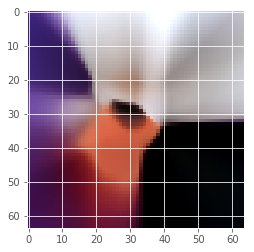

#iteration 20: 0.40339518
#iteration 21: 0.4172414
#iteration 22: 0.40650833
#iteration 23: 0.4112329
#iteration 24: 0.38268673
#iteration 25: 0.3981559
#iteration 26: 0.3793981
#iteration 27: 0.3870371
#iteration 28: 0.38731635
#iteration 29: 0.40251434
#iteration 30: 0.38468808
#iteration 31: 0.36770228
#iteration 32: 0.3629386
#iteration 33: 0.37788016
#iteration 34: 0.357008
#iteration 35: 0.35431182
#iteration 36: 0.35337317
#iteration 37: 0.3520565
#iteration 38: 0.35624897
#iteration 39: 0.36402643


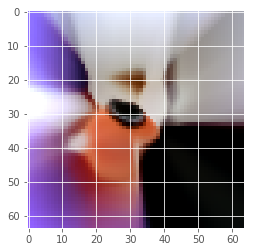

#iteration 40: 0.33500192
#iteration 41: 0.35781306
#iteration 42: 0.3444332
#iteration 43: 0.34316537
#iteration 44: 0.3342011
#iteration 45: 0.32474506
#iteration 46: 0.34757894
#iteration 47: 0.33105513
#iteration 48: 0.32913688
#iteration 49: 0.35619575
#iteration 50: 0.33614713
#iteration 51: 0.3140099
#iteration 52: 0.31486315
#iteration 53: 0.31621665
#iteration 54: 0.3220298
#iteration 55: 0.3198281
#iteration 56: 0.31215078
#iteration 57: 0.32973167
#iteration 58: 0.31016302
#iteration 59: 0.318444


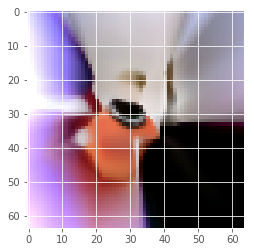

#iteration 60: 0.29884356
#iteration 61: 0.3113015
#iteration 62: 0.31414777
#iteration 63: 0.31090933
#iteration 64: 0.29924366
#iteration 65: 0.30448696
#iteration 66: 0.29423648
#iteration 67: 0.30091763
#iteration 68: 0.312446
#iteration 69: 0.32309195
#iteration 70: 0.30468404
#iteration 71: 0.30301708
#iteration 72: 0.3000449
#iteration 73: 0.31399846
#iteration 74: 0.30682433
#iteration 75: 0.28965843
#iteration 76: 0.2854405
#iteration 77: 0.27810466
#iteration 78: 0.28681278
#iteration 79: 0.29383707


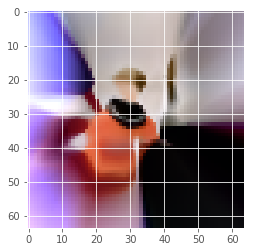

#iteration 80: 0.28515622
#iteration 81: 0.29564196
#iteration 82: 0.28349704
#iteration 83: 0.29082716
#iteration 84: 0.28040653
#iteration 85: 0.2862746
#iteration 86: 0.28681564
#iteration 87: 0.27435637
#iteration 88: 0.27380162
#iteration 89: 0.2888916
#iteration 90: 0.2914268
#iteration 91: 0.27657098
#iteration 92: 0.27282956
#iteration 93: 0.28240287
#iteration 94: 0.26544896
#iteration 95: 0.27397835
#iteration 96: 0.2823484
#iteration 97: 0.28325158
#iteration 98: 0.28574067
#iteration 99: 0.2567075


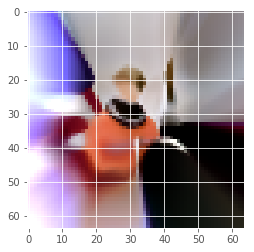

#iteration 100: 0.26857713
#iteration 101: 0.281918
#iteration 102: 0.27499765
#iteration 103: 0.2986858
#iteration 104: 0.26633498
#iteration 105: 0.2641166
#iteration 106: 0.25139993
#iteration 107: 0.25861448
#iteration 108: 0.26493147
#iteration 109: 0.25437534
#iteration 110: 0.25632426
#iteration 111: 0.26958665
#iteration 112: 0.25757957
#iteration 113: 0.27333292
#iteration 114: 0.26424432
#iteration 115: 0.2629248
#iteration 116: 0.26471934
#iteration 117: 0.25587732
#iteration 118: 0.2546237
#iteration 119: 0.26218587


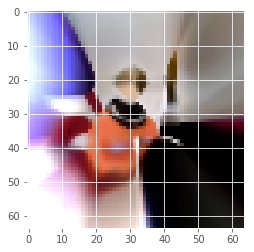

#iteration 120: 0.2586884
#iteration 121: 0.27696034
#iteration 122: 0.25569904
#iteration 123: 0.24324495
#iteration 124: 0.25718448
#iteration 125: 0.25431365
#iteration 126: 0.27493376
#iteration 127: 0.26282927
#iteration 128: 0.2591027
#iteration 129: 0.25206178
#iteration 130: 0.24386367
#iteration 131: 0.24766609
#iteration 132: 0.26238006
#iteration 133: 0.25016966
#iteration 134: 0.25231245
#iteration 135: 0.24595703
#iteration 136: 0.26276356
#iteration 137: 0.24174927
#iteration 138: 0.25032786
#iteration 139: 0.24539766


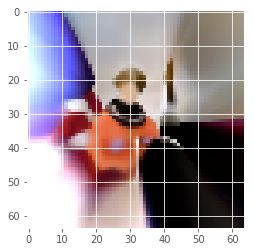

#iteration 140: 0.26482064
#iteration 141: 0.24817324
#iteration 142: 0.2363925
#iteration 143: 0.2463589
#iteration 144: 0.26993686
#iteration 145: 0.24298449
#iteration 146: 0.2524824
#iteration 147: 0.24349359
#iteration 148: 0.25271565
#iteration 149: 0.25341165
#iteration 150: 0.23768918
#iteration 151: 0.24294785
#iteration 152: 0.23585987
#iteration 153: 0.26300803
#iteration 154: 0.23991638
#iteration 155: 0.24125406
#iteration 156: 0.2361066
#iteration 157: 0.23519194
#iteration 158: 0.24793883
#iteration 159: 0.24348101


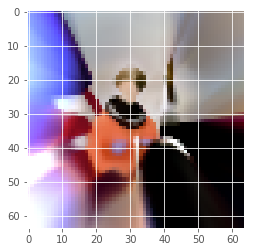

#iteration 160: 0.23270488
#iteration 161: 0.22610106
#iteration 162: 0.24820942
#iteration 163: 0.23744565
#iteration 164: 0.23089181
#iteration 165: 0.24199727
#iteration 166: 0.22322676
#iteration 167: 0.26204118
#iteration 168: 0.25396824
#iteration 169: 0.2239652
#iteration 170: 0.2389961
#iteration 171: 0.22618152
#iteration 172: 0.23482198
#iteration 173: 0.23986572
#iteration 174: 0.23949903
#iteration 175: 0.2272351
#iteration 176: 0.23036824
#iteration 177: 0.24066932
#iteration 178: 0.23176444
#iteration 179: 0.22471625


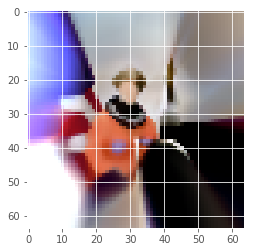

#iteration 180: 0.2597468
#iteration 181: 0.22809851
#iteration 182: 0.2376506
#iteration 183: 0.22878236
#iteration 184: 0.21767229
#iteration 185: 0.22477378
#iteration 186: 0.23760277
#iteration 187: 0.23086628
#iteration 188: 0.23853105
#iteration 189: 0.23332271
#iteration 190: 0.22384045
#iteration 191: 0.23461406
#iteration 192: 0.21727955
#iteration 193: 0.21984494
#iteration 194: 0.22524585
#iteration 195: 0.2340928
#iteration 196: 0.21153408
#iteration 197: 0.24176449
#iteration 198: 0.22490442
#iteration 199: 0.21814078


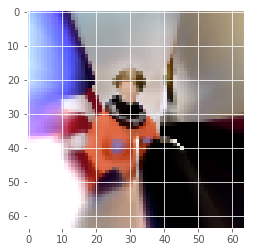

#iteration 200: 0.22628054
#iteration 201: 0.22612783
#iteration 202: 0.23046257
#iteration 203: 0.22254838
#iteration 204: 0.224235
#iteration 205: 0.23354912
#iteration 206: 0.2231582
#iteration 207: 0.23157966
#iteration 208: 0.22190271
#iteration 209: 0.22821783
#iteration 210: 0.22453222
#iteration 211: 0.2218754
#iteration 212: 0.22099021
#iteration 213: 0.22042817
#iteration 214: 0.23046976
#iteration 215: 0.22111845
#iteration 216: 0.23221254
#iteration 217: 0.21600631
#iteration 218: 0.2292979
#iteration 219: 0.22524936


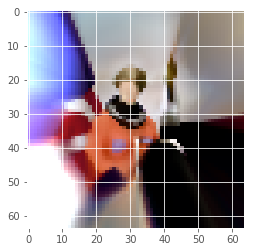

#iteration 220: 0.21127562
#iteration 221: 0.20915209
#iteration 222: 0.23470777
#iteration 223: 0.2158745
#iteration 224: 0.22379446
#iteration 225: 0.20864359
#iteration 226: 0.22794312
#iteration 227: 0.22455584
#iteration 228: 0.23093766
#iteration 229: 0.23145124
#iteration 230: 0.23178206
#iteration 231: 0.2237396
#iteration 232: 0.2132
#iteration 233: 0.21518554
#iteration 234: 0.21332449
#iteration 235: 0.2220509
#iteration 236: 0.2102918
#iteration 237: 0.20683794
#iteration 238: 0.20527741
#iteration 239: 0.20122778


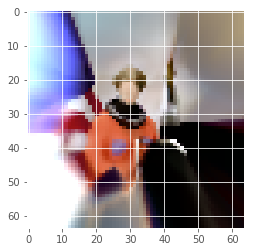

#iteration 240: 0.20835483
#iteration 241: 0.22105372
#iteration 242: 0.2127173
#iteration 243: 0.20756063
#iteration 244: 0.21562392
#iteration 245: 0.22401166
#iteration 246: 0.19790842
#iteration 247: 0.20535198
#iteration 248: 0.20470724
#iteration 249: 0.20699501
#iteration 250: 0.22815396
#iteration 251: 0.2206399
#iteration 252: 0.21395153
#iteration 253: 0.22454801
#iteration 254: 0.20950812
#iteration 255: 0.22472146
#iteration 256: 0.20509303
#iteration 257: 0.21478324
#iteration 258: 0.19596028
#iteration 259: 0.20248605


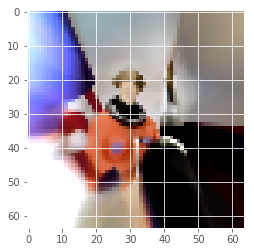

#iteration 260: 0.21217567
#iteration 261: 0.19832915
#iteration 262: 0.21657649
#iteration 263: 0.20649642
#iteration 264: 0.20364664
#iteration 265: 0.20819756
#iteration 266: 0.21691266
#iteration 267: 0.2238723
#iteration 268: 0.22189853
#iteration 269: 0.22842437
#iteration 270: 0.19763637
#iteration 271: 0.20473698
#iteration 272: 0.20216364
#iteration 273: 0.20031607
#iteration 274: 0.2098999
#iteration 275: 0.2070825
#iteration 276: 0.21780455
#iteration 277: 0.20300803
#iteration 278: 0.21658853
#iteration 279: 0.20062335


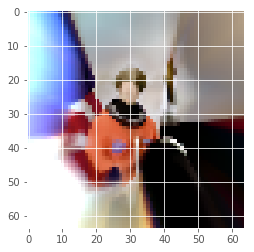

#iteration 280: 0.19636917
#iteration 281: 0.21642244
#iteration 282: 0.19157232
#iteration 283: 0.20252872
#iteration 284: 0.1986919
#iteration 285: 0.20594963
#iteration 286: 0.20071632
#iteration 287: 0.19978759
#iteration 288: 0.20058633
#iteration 289: 0.21041907
#iteration 290: 0.21338761
#iteration 291: 0.19902147
#iteration 292: 0.2127984
#iteration 293: 0.20983881
#iteration 294: 0.19958282
#iteration 295: 0.20177582
#iteration 296: 0.20377047
#iteration 297: 0.20075083
#iteration 298: 0.22530337
#iteration 299: 0.2026038


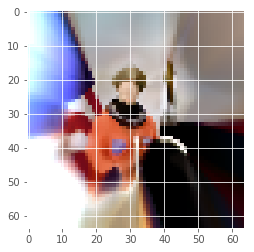

#iteration 300: 0.2076641
#iteration 301: 0.20245934
#iteration 302: 0.2130656
#iteration 303: 0.19212331
#iteration 304: 0.20316885
#iteration 305: 0.19529821
#iteration 306: 0.19712433
#iteration 307: 0.20981854
#iteration 308: 0.20861964
#iteration 309: 0.19710043
#iteration 310: 0.20307973
#iteration 311: 0.19332889
#iteration 312: 0.2015711
#iteration 313: 0.20674345
#iteration 314: 0.20884803
#iteration 315: 0.19522545
#iteration 316: 0.21368065
#iteration 317: 0.201289
#iteration 318: 0.1993891
#iteration 319: 0.195972


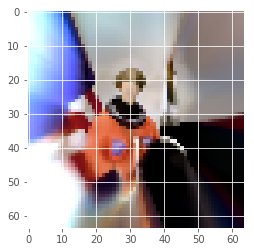

#iteration 320: 0.19728513
#iteration 321: 0.19882765
#iteration 322: 0.20511875
#iteration 323: 0.19306971
#iteration 324: 0.19919093
#iteration 325: 0.19074568
#iteration 326: 0.21195032
#iteration 327: 0.20430952
#iteration 328: 0.2002638
#iteration 329: 0.19122595
#iteration 330: 0.20299211
#iteration 331: 0.18891183
#iteration 332: 0.19514292
#iteration 333: 0.19108737
#iteration 334: 0.19719824
#iteration 335: 0.20334235
#iteration 336: 0.18501239
#iteration 337: 0.20396286
#iteration 338: 0.20627631
#iteration 339: 0.2181358


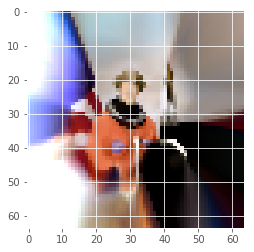

#iteration 340: 0.20276602
#iteration 341: 0.18737191
#iteration 342: 0.18826522
#iteration 343: 0.18877444
#iteration 344: 0.20436329
#iteration 345: 0.19240649
#iteration 346: 0.1872277
#iteration 347: 0.19064248
#iteration 348: 0.19561784
#iteration 349: 0.2083089
#iteration 350: 0.19087954
#iteration 351: 0.1777133
#iteration 352: 0.18426771
#iteration 353: 0.20676193
#iteration 354: 0.18849996
#iteration 355: 0.17678799
#iteration 356: 0.17694491
#iteration 357: 0.19079009
#iteration 358: 0.19685726
#iteration 359: 0.18800563


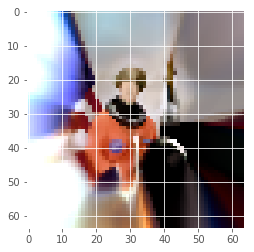

#iteration 360: 0.18169698
#iteration 361: 0.1768268
#iteration 362: 0.19560218
#iteration 363: 0.19220358
#iteration 364: 0.19088267
#iteration 365: 0.18229502
#iteration 366: 0.20969003
#iteration 367: 0.17209296
#iteration 368: 0.17847443
#iteration 369: 0.18002626
#iteration 370: 0.17880633
#iteration 371: 0.18668276
#iteration 372: 0.17891547
#iteration 373: 0.17179756
#iteration 374: 0.18326004
#iteration 375: 0.19136852
#iteration 376: 0.17801824
#iteration 377: 0.18276562
#iteration 378: 0.18350832
#iteration 379: 0.17982213


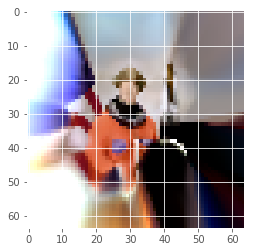

#iteration 380: 0.18590373
#iteration 381: 0.1793885
#iteration 382: 0.18779987
#iteration 383: 0.19126317
#iteration 384: 0.1866087
#iteration 385: 0.17613125
#iteration 386: 0.19168305
#iteration 387: 0.17685813
#iteration 388: 0.17101994
#iteration 389: 0.17325981
#iteration 390: 0.20174506
#iteration 391: 0.18506101
#iteration 392: 0.1808784
#iteration 393: 0.17986448
#iteration 394: 0.17414403
#iteration 395: 0.17142864
#iteration 396: 0.17775092
#iteration 397: 0.19355756
#iteration 398: 0.17015047
#iteration 399: 0.18039478


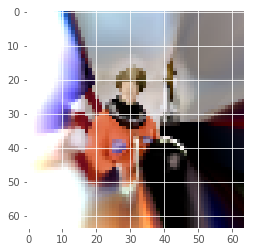

#iteration 400: 0.17947294
#iteration 401: 0.17453097
#iteration 402: 0.18626276
#iteration 403: 0.18146856
#iteration 404: 0.18485871
#iteration 405: 0.17885582
#iteration 406: 0.1768389
#iteration 407: 0.20002885
#iteration 408: 0.16998799
#iteration 409: 0.18037668
#iteration 410: 0.18452194
#iteration 411: 0.17792028
#iteration 412: 0.17282107
#iteration 413: 0.17406383
#iteration 414: 0.17742188
#iteration 415: 0.17566034
#iteration 416: 0.18928805
#iteration 417: 0.16755566
#iteration 418: 0.16419967
#iteration 419: 0.17003767


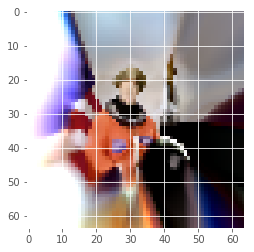

#iteration 420: 0.16119453
#iteration 421: 0.18894932
#iteration 422: 0.17664894
#iteration 423: 0.18270046
#iteration 424: 0.16508777
#iteration 425: 0.19223125
#iteration 426: 0.1661323
#iteration 427: 0.16441044
#iteration 428: 0.1722177
#iteration 429: 0.16588408
#iteration 430: 0.16983798
#iteration 431: 0.16405568
#iteration 432: 0.16377416
#iteration 433: 0.17825374
#iteration 434: 0.1709742
#iteration 435: 0.1592496
#iteration 436: 0.16310948
#iteration 437: 0.178006
#iteration 438: 0.15874049
#iteration 439: 0.16336393


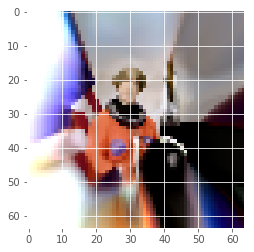

#iteration 440: 0.17131194
#iteration 441: 0.17314771
#iteration 442: 0.16401948
#iteration 443: 0.17676711
#iteration 444: 0.1682394
#iteration 445: 0.16158101
#iteration 446: 0.1690975
#iteration 447: 0.16521125
#iteration 448: 0.1596325
#iteration 449: 0.1578641
#iteration 450: 0.16352631
#iteration 451: 0.15368932
#iteration 452: 0.18090352
#iteration 453: 0.15488707
#iteration 454: 0.17013521
#iteration 455: 0.17920086
#iteration 456: 0.16391605
#iteration 457: 0.15822761
#iteration 458: 0.16827598
#iteration 459: 0.16282286


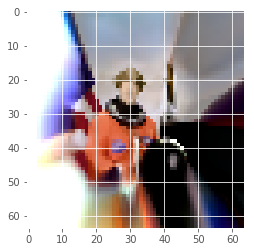

#iteration 460: 0.15261969
#iteration 461: 0.17502591
#iteration 462: 0.17932624
#iteration 463: 0.16516156
#iteration 464: 0.17791262
#iteration 465: 0.17842895
#iteration 466: 0.17376217
#iteration 467: 0.15893085
#iteration 468: 0.17620948
#iteration 469: 0.17003016
#iteration 470: 0.17609319
#iteration 471: 0.15874617
#iteration 472: 0.16809173
#iteration 473: 0.16680385
#iteration 474: 0.17351462
#iteration 475: 0.17144266
#iteration 476: 0.1670135
#iteration 477: 0.15614773
#iteration 478: 0.15833256
#iteration 479: 0.16118091


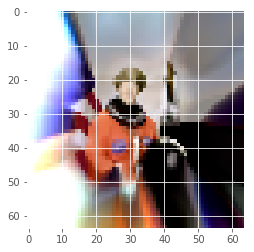

#iteration 480: 0.15840212
#iteration 481: 0.16723296
#iteration 482: 0.15501085
#iteration 483: 0.16947839
#iteration 484: 0.16721624
#iteration 485: 0.14914571
#iteration 486: 0.16151048
#iteration 487: 0.17083539
#iteration 488: 0.15502334
#iteration 489: 0.17232409
#iteration 490: 0.16525936
#iteration 491: 0.15980183
#iteration 492: 0.17502248
#iteration 493: 0.16655514
#iteration 494: 0.17955375
#iteration 495: 0.15920907
#iteration 496: 0.17411074
#iteration 497: 0.15184931
#iteration 498: 0.15669987
#iteration 499: 0.16123378


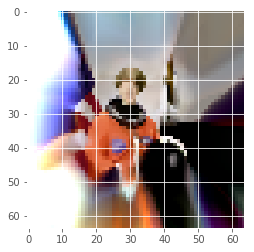

In [63]:
n_iterations = 500
batch_size = 50

sess = tf.InteractiveSession();
sess.run(tf.global_variables_initializer())

prev_training_cost = 0.0
for it_i in range(n_iterations):
    idxs = np.random.permutation(range(len(pos)))
    n_batches = len(idxs) // batch_size
    for batch_i in range(n_batches):
        idxs_i = idxs[batch_i*batch_size : (batch_i+1)*batch_size]
        sess.run(optimizer, feed_dict={X: pos[idxs_i] , Y: colors[idxs_i]})

    training_cost = sess.run(cost, feed_dict={X: pos, Y: colors})
    print('#iteration ' + str(it_i) + ': ' + str(training_cost))

    if (it_i + 1) % 20 == 0:
        color_pred = Y_pred.eval(feed_dict={X: pos * 2})
        fig, ax = plt.subplots(1, 1)
        img = np.clip(color_pred.reshape(img.shape) * 255, 0, 255).astype(np.uint8)
        plt.imshow(img)
        plt.show()

In [70]:
def draw(img, scl):
    color_pred = Y_pred.eval(feed_dict={X: pos * scl})
    fig, ax = plt.subplots(1, 1)
    img_to_draw = np.clip(color_pred.reshape(img.shape) * 255, 0, 255).astype(np.uint8)
    plt.imshow(img_to_draw)
    plt.show()

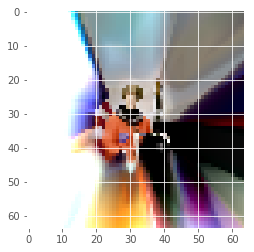

In [72]:
draw(img, 3)

# Scenario & Task
This is basically a "supervised regression" problem.
- supervised: We have the answer (colors, r/g/b) of the all the input data (position, r/c or x/y).
- regression: And the output is two scalar